# **Import Library yang dibutuhkan**

In [ ]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_LineGetRich_1.csv")
df.head()

,userName,score,at,content
0,X- Man,1,2024-05-02 23:33:17,Setiap main pasti sinyal menghubungkan padahal...
1,Nori Yanto,1,2024-05-02 22:16:25,MAKIN HARI MAKIN GAK JELAS
2,Arif,1,2024-05-02 21:50:25,Tolong fix lag in game
3,FiQi Koclok,2,2024-05-02 21:50:10,sebenernya bagus gamenya tapi yaaah tau sendir...
4,10.ADITYA YOGA HUTAMA,1,2024-05-02 19:54:54,game kikir game rusak


In [ ]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Setiap main pasti sinyal menghubungkan padahal...,X- Man,2024-05-02 23:33:17
1,MAKIN HARI MAKIN GAK JELAS,Nori Yanto,2024-05-02 22:16:25
2,Tolong fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya tapi yaaah tau sendir...,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
592,Terlalu p2w susah bgt buat yg ga punya duit me...,Ayub Alrizki,2024-03-16 14:52:25
593,"Akun line ku hilang, tapi masih ada kata teman...",STAZT *,2024-03-16 13:41:09
594,ok,eja noviandi,2024-03-16 13:30:04
595,Ga kaya getrich 2013 .. Skarang bener2 p2w.. D...,Two Wich,2024-03-16 11:51:49


In [ ]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [ ]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,562,595,597
top,Good,Slamet Riyadi,2024-05-02 23:33:17
freq,7,2,1


# **Cleaning Data**

In [ ]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [ ]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [ ]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Menghapus data yang kosong
df = df.dropna()

In [ ]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [ ]:
df.shape

(562, 3)

In [ ]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [ ]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,setiap main pasti sinyal menghubungkan padahal...,X- Man,2024-05-02 23:33:17
1,makin hari makin gak jelas,Nori Yanto,2024-05-02 22:16:25
2,tolong fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya tapi yaaah tau sendir...,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
591,permainan gak masuk akal belum main lawan udah...,Edi Suhendra,2024-03-16 15:24:11
592,terlalu p2w susah bgt buat yg ga punya duit me...,Ayub Alrizki,2024-03-16 14:52:25
593,akun line ku hilang tapi masih ada kata teman ...,STAZT *,2024-03-16 13:41:09
595,ga kaya getrich 2013 skarang bener2 p2w dah ga...,Two Wich,2024-03-16 11:51:49


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [ ]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,setiap main pasti sinyal menghubungkan padahal...,X- Man,2024-05-02 23:33:17
1,makin hari makin tidak jelas,Nori Yanto,2024-05-02 22:16:25
2,tolong fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya tapi yaaah tau sendir...,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
591,permainan tidak masuk akal belum main lawan ud...,Edi Suhendra,2024-03-16 15:24:11
592,terlalu p2w susah sangat buat yang ga punya du...,Ayub Alrizki,2024-03-16 14:52:25
593,akun line ku hilang tapi masih ada kata teman ...,STAZT *,2024-03-16 13:41:09
595,ga kaya getrich 2013 skarang bener2 p2w dah ti...,Two Wich,2024-03-16 11:51:49


In [ ]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,main sinyal menghubungkan padahal udh pakai wi...,X- Man,2024-05-02 23:33:17
1,makin hari makin jelas,Nori Yanto,2024-05-02 22:16:25
2,fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya yaaah tau sendirilah,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
591,permainan masuk akal main lawan udah complete ...,Edi Suhendra,2024-03-16 15:24:11
592,terlalu p2w susah sangat buat ga punya duit me...,Ayub Alrizki,2024-03-16 14:52:25
593,akun line ku hilang masih kata teman ku loginn...,STAZT *,2024-03-16 13:41:09
595,ga kaya getrich 2013 skarang bener2 p2w dah se...,Two Wich,2024-03-16 11:51:49


In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [main, sinyal, menghubungkan, padahal, udh, pa...
1                            [makin, hari, makin, jelas]
2                                   [fix, lag, in, game]
3      [sebenernya, bagus, gamenya, yaaah, tau, sendi...
4                             [game, kikir, game, rusak]
                             ...                        
591    [permainan, masuk, akal, main, lawan, udah, co...
592    [terlalu, p2w, susah, sangat, buat, ga, punya,...
593    [akun, line, ku, hilang, masih, kata, teman, k...
595    [ga, kaya, getrich, 2013, skarang, bener2, p2w...
596    [game, ngk, ngotak, sih, masa, tiap, main, bel...
Name: content, Length: 562, dtype: object

In [ ]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LineGetrich_1.csv', index = False)


In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LineGetrich_1.csv', encoding = 'latin1')
df_clean

,content
0,main sinyal hubung padahal udh pakai wifi wifi...
1,makin hari makin jelas
2,fix lag in game
3,sebenernya bagus gamenya yaaah tau sendiri
4,game kikir game rusak
...,...
557,main masuk akal main lawan udah complete sendi...
558,terlalu p2w susah sangat buat ga punya duit me...
559,akun line ku hilang masih kata teman ku loginn...
560,ga kaya getrich 2013 skarang bener2 p2w dah se...


# **Translate**

In [ ]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:
import pandas as pd
from easynmt import EasyNMT

In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LineGetrich_1.csv', encoding='latin1')

In [ ]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [ ]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 9.75MB/s]                   


In [ ]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,main sinyal hubung padahal udh pakai wifi wifi...
1,makin hari makin jelas
2,fix lag in game
3,sebenernya bagus gamenya yaaah tau sendiri
4,game kikir game rusak
...,...
557,main masuk akal main lawan udah complete sendi...
558,terlalu p2w susah sangat buat ga punya duit me...
559,akun line ku hilang masih kata teman ku loginn...
560,ga kaya getrich 2013 skarang bener2 p2w dah se...


In [ ]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LineGetrich_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LineGetrich_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...
1,1,makin hari makin jelas,The more the day becomes clear.
2,2,fix lag in game,fix lag in game
3,3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game."
4,4,game kikir game rusak,game file game is broken
...,...,...,...
557,557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.
558,558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...
559,559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...
560,560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...


# **Labeling**

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LineGetrich_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...
1,1,makin hari makin jelas,The more the day becomes clear.
2,2,fix lag in game,fix lag in game
3,3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game."
4,4,game kikir game rusak,game file game is broken
...,...,...,...
557,557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.
558,558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...
559,559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...
560,560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...


In [33]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [34]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 224
Netral = 147
Negatif = 191

Total Data Seluruhnya : 562


In [36]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,Positif
1,1,makin hari makin jelas,The more the day becomes clear.,Positif
2,2,fix lag in game,fix lag in game,Negatif
3,3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",Positif
4,4,game kikir game rusak,game file game is broken,Negatif
...,...,...,...,...
557,557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,Positif
558,558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,Positif
559,559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,Negatif
560,560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...,Positif


In [37]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,Positif
1,makin hari makin jelas,The more the day becomes clear.,Positif
2,fix lag in game,fix lag in game,Negatif
3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",Positif
4,game kikir game rusak,game file game is broken,Negatif
...,...,...,...
557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,Positif
558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,Positif
559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,Negatif
560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...,Positif


# **Visualisasi**


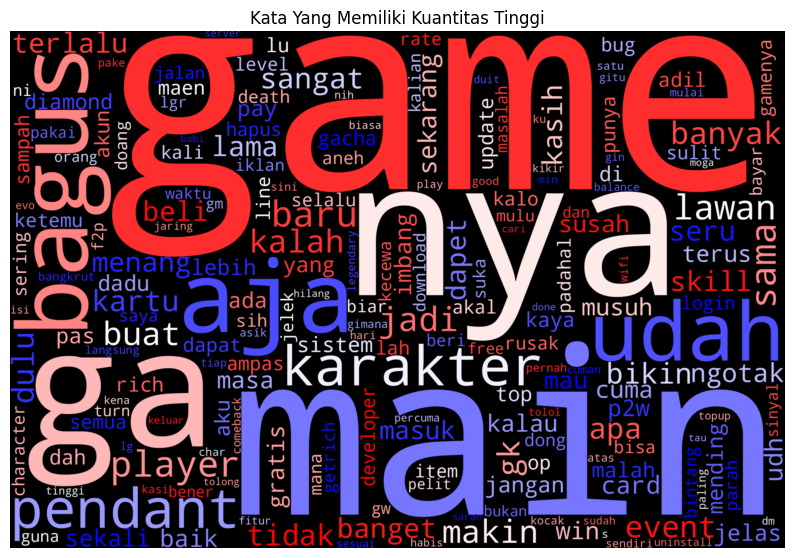

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


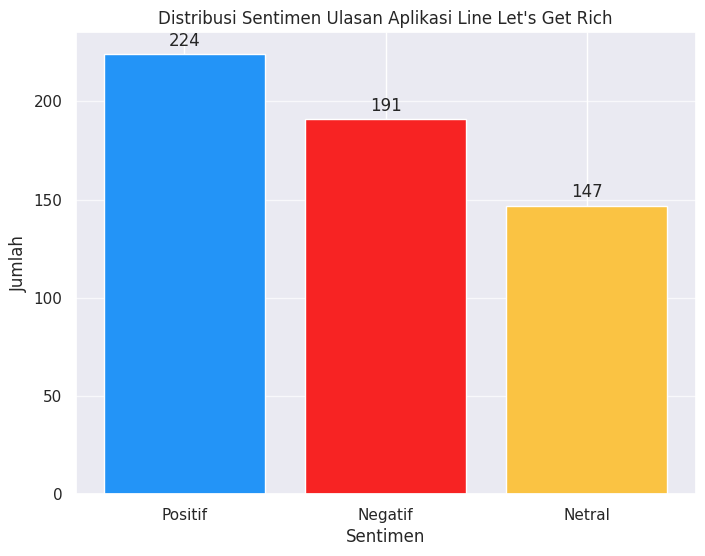

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Line Let's Get Rich")


In [41]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,Positif
1,makin hari makin jelas,The more the day becomes clear.,Positif
2,fix lag in game,fix lag in game,Negatif
3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",Positif
4,game kikir game rusak,game file game is broken,Negatif
...,...,...,...
556,ku bagus banyak ngeleg belakang,I'm good. Back a lot.,Positif
557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,Positif
558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,Positif
559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,Negatif


In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,1
1,makin hari makin jelas,The more the day becomes clear.,1
2,fix lag in game,fix lag in game,0
3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",1
4,game kikir game rusak,game file game is broken,0
...,...,...,...
556,ku bagus banyak ngeleg belakang,I'm good. Back a lot.,1
557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,1
558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,1
559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,0


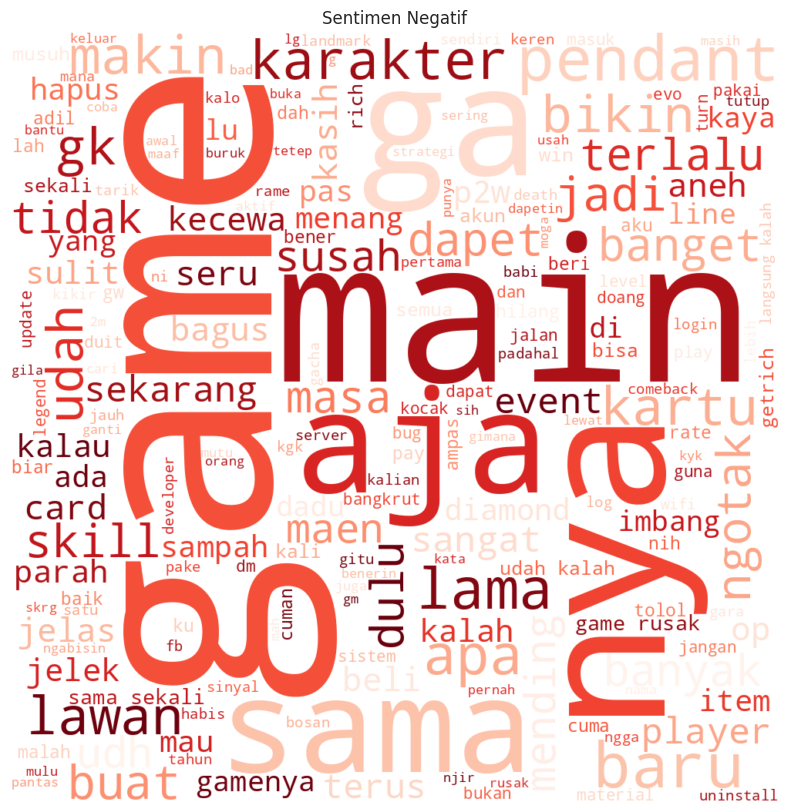

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

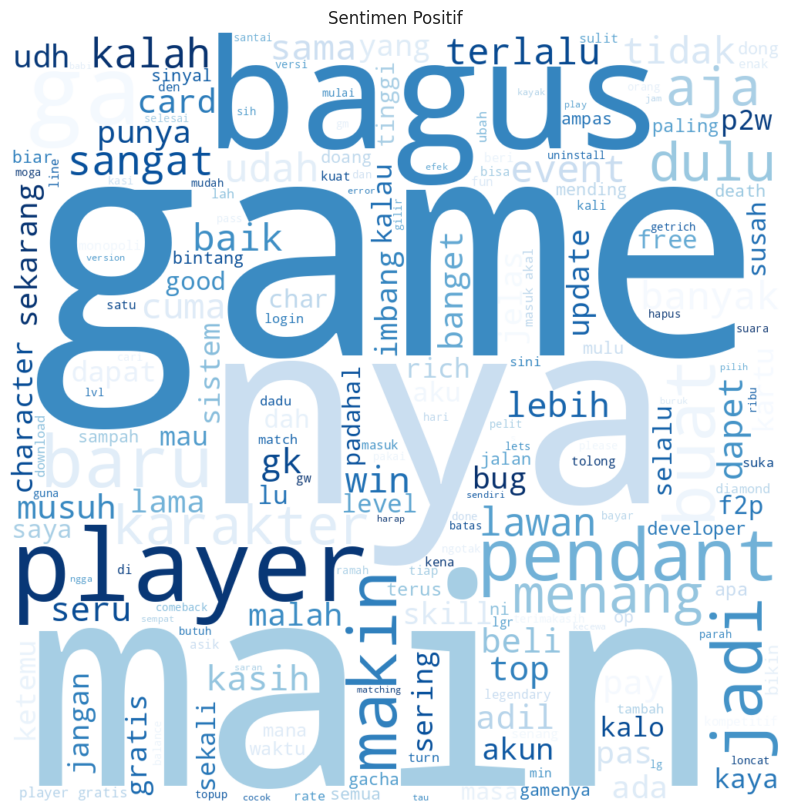

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    224
0    191
Name: count, dtype: int64

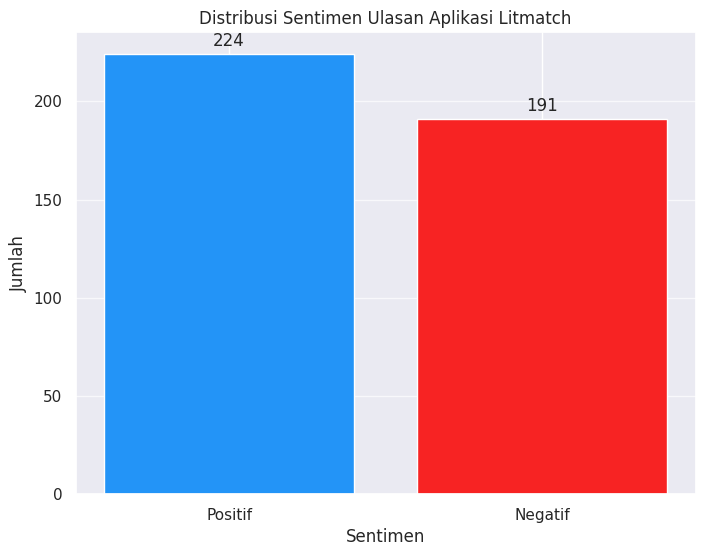

In [46]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Litmatch")

# **Data Preparation**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

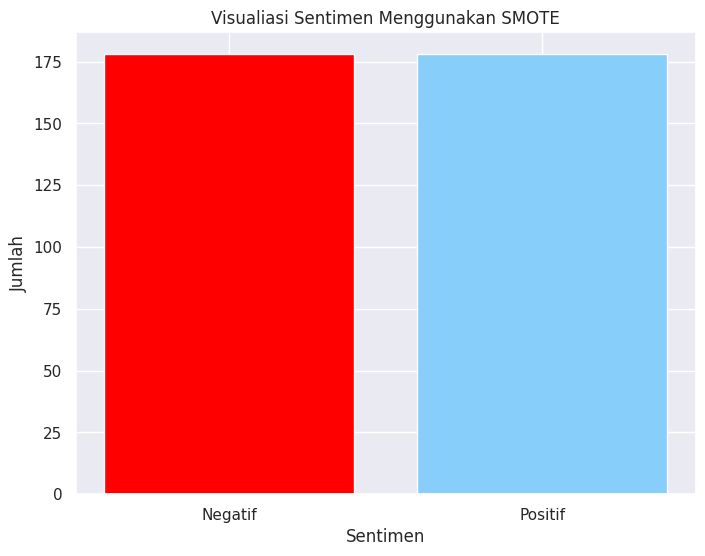

In [51]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [52]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [53]:
y_pred = naive_bayes.predict(X_test_vec)

In [54]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6506024096385542

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.57      0.86      0.69        37
     Positif       0.81      0.48      0.60        46

    accuracy                           0.65        83
   macro avg       0.69      0.67      0.65        83
weighted avg       0.71      0.65      0.64        83



# **Testing**


In [55]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek dapet lawan ngga seimbang
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : lumayan , bagus sering dapet 1000 diamond gratis
Hasil Analisis Sentimen Untuk Teks Baru : Positif
